In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
back = cv2.imread('poker.jpg')



## 조커 카드를 골랐다

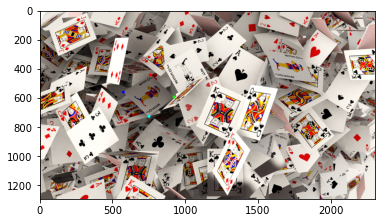

In [4]:
back = cv2.imread('poker.jpg')
h,w,c = back.shape


back = cv2.resize(back,None,fx=0.5,fy=0.5 , interpolation=cv2.INTER_AREA)

#matplotlib , bgr=> rgb
back = cv2.cvtColor(back, cv2.COLOR_BGR2RGB)
#좌표확인을 위한 함수
def get_points(event,x,y,flag,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,y)

        
#좌상
pt1=[758,444]
#우상
pt2 = [922,595]
#좌하
pt3=[573,563]
#우하
pt4=[749,729]

#
cv2.circle(back,(758,444),10,(255,0,0),-1)
cv2.circle(back,(922,595),10,(0,255,0),-1)
cv2.circle(back,(573,563),10,(0,0,255),-1)
cv2.circle(back,(749,729),10,(0,255,255),-1)




#좌표점 좌상=>좌하=>우상=>우하
pts1 = np.float32([pt1,pt3,pt2,pt4])

pts2 = np.float32([[10,10],[10,500],[500,10],[500,500]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(back,M,(500,500))



plt.plot()
plt.imshow(back)
# cv2.imshow('back',back)
# cv2.imshow('dst',dst)   
# cv2.setMouseCallback('back',get_points)
cv2.waitKey(0)
cv2.destroyAllWindows()

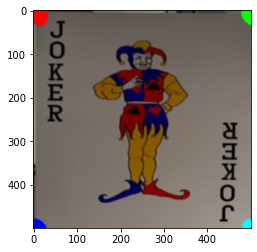

In [5]:
plt.plot()
plt.imshow(dst)


## 위의 모델에서 아주 기울어진 Q카드 선택

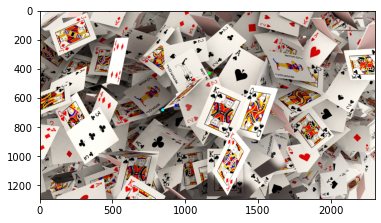

In [11]:
back = cv2.imread('poker.jpg')
h,w,c = back.shape


back = cv2.resize(back,None,fx=0.5,fy=0.5 , interpolation=cv2.INTER_AREA)

#matplotlib , bgr=> rgb
back = cv2.cvtColor(back, cv2.COLOR_BGR2RGB)

#좌표확인을 위한 함수
def get_points(event,x,y,flag,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,y)

        
# #좌상
pt1=[1058,477]
# #우상
pt2 = [1163,434]
# #좌하
pt3=[843,684]
# #우하
pt4=[934,654]

#좌표에서 표시. 
cv2.circle(back,(1058,477),10,(255,0,0),-1)
cv2.circle(back,(1163,434),10,(0,255,0),-1)
cv2.circle(back,(934,654),10,(0,0,255),-1)
cv2.circle(back,(843,684),10,(0,255,255),-1)

# #좌표점 좌상=>좌하=>우상=>우하
pts1 = np.float32([pt1,pt3,pt2,pt4])

pts2 = np.float32([[10,10],[10,500],[500,10],[500,500]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(back,M,(1000,1000))



        
# cv2.imshow('back',back)
# cv2.imshow('dst',dst)   
# cv2.setMouseCallback('back',get_points)

plt.plot()
plt.imshow(back)

cv2.waitKey(0)
cv2.destroyAllWindows()

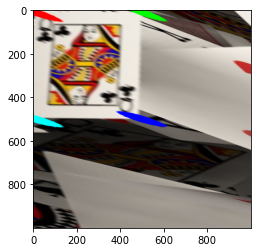

In [12]:
plt.plot()
plt.imshow(dst)


## 아주 기울어진 Q카드를 \
## 흐릿하지만 확인할수 있었다

## 그래서 여기서 선명화 작업!

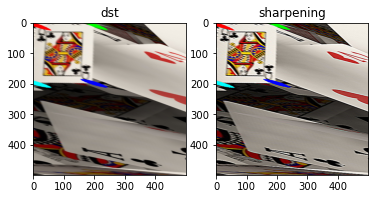

In [8]:
#샤프닝해주기
blr = cv2.GaussianBlur(dst,(5,5),5)

#샤프닝 모델 가중치 여러 수치로
filter_dst1 = np.clip(4.0*dst-3.0*blr,0,255).astype('uint8')
filter_dst2 = np.clip(2.0*dst-blr,0,255).astype('uint8')

# 1번 가중치 샤프닝 모델이 더 선명해보인다 미세하지만

# 노이즈 흐리게 경계선 명확하게 블러링 양방향 필터
bila_dst = cv2.bilateralFilter(filter_dst1,9,100,100)

# 양방향 필터링을 통한 변화는 잘 못느끼겟다



# cv2.imshow('dst',dst)   
# cv2.imshow('filter_dst',filter_dst)
# cv2.imshow('filter_dst2',filter_dst2)
# cv2.imshow('bila_dst',bila_dst)


plt.subplot(121), plt.imshow(dst), plt.title('dst')
plt.subplot(122),plt.imshow(filter_dst1),plt.title('sharpening')
# plt.subplot(122),plt.imshow(bila_dst),plt.title('bilateral')
cv2.waitKey(0)
cv2.destroyAllWindows()